In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path 
import seaborn as sns 

data_dir = Path("../hive/aggregrate_output")
out_dir = Path("output")

# Coeff By Year 

Here, we examine, per year, the effect of 1 hectare of tree loss (deforestation) on CO2 emissions, as measured in metric tons, 

## Global Coeff 

[Tutorial For Styling](https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/)

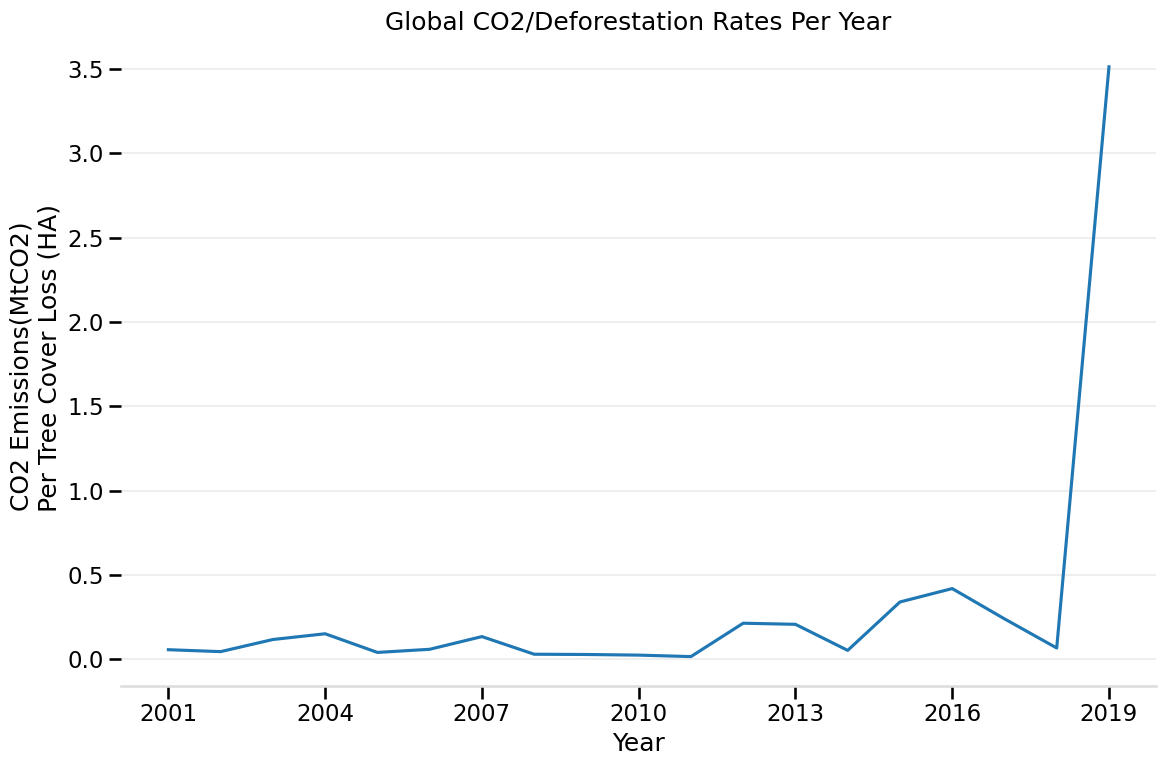

In [120]:
sns.set_context('talk')

# Grab Data 
coeff_by_year = pd.read_csv(data_dir / "coeff_by_year.csv", header=None)
coeff_by_year.columns = ["Year", "Rate"]
coeff_by_year["Year"].astype(int)

# Plot Graph 
fig, ax = plt.subplots(figsize=(12, 8))
_ = ax.plot(coeff_by_year.Year, coeff_by_year.Rate)

# Set Plot Labels 
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions(MtCO2) \n Per Tree Cover Loss (HA)")
ax.set_title("Global CO2/Deforestation Rates Per Year")

# Set Spines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Modify Axes and Grids 
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.xaxis.set_ticks(range(2001, 2020, 3))

# Show with Tight Layout 
fig.tight_layout()
fig.savefig(out_dir / "global_coefficient_by_year.png")

## Top 3 Countries By Coeff

In [3]:
# Grab and Filter Data 
df2 = pd.read_csv(data_dir / "top_10_countires_per_year_by_coeff.csv", 
    header=None)
df2.columns = ["ISO", "Year", "Rate", "Rank"]
df2 = df2[df2.Rank <= 3]

# Filter Out One Bad Row 
df2.drop(index=180, inplace=True)
df2.at[181, "Rank"] = 1 
df2.at[182, "Rank"] = 2 
df2.loc[190] = ["SDN",2019,0.37249430952284246,3]

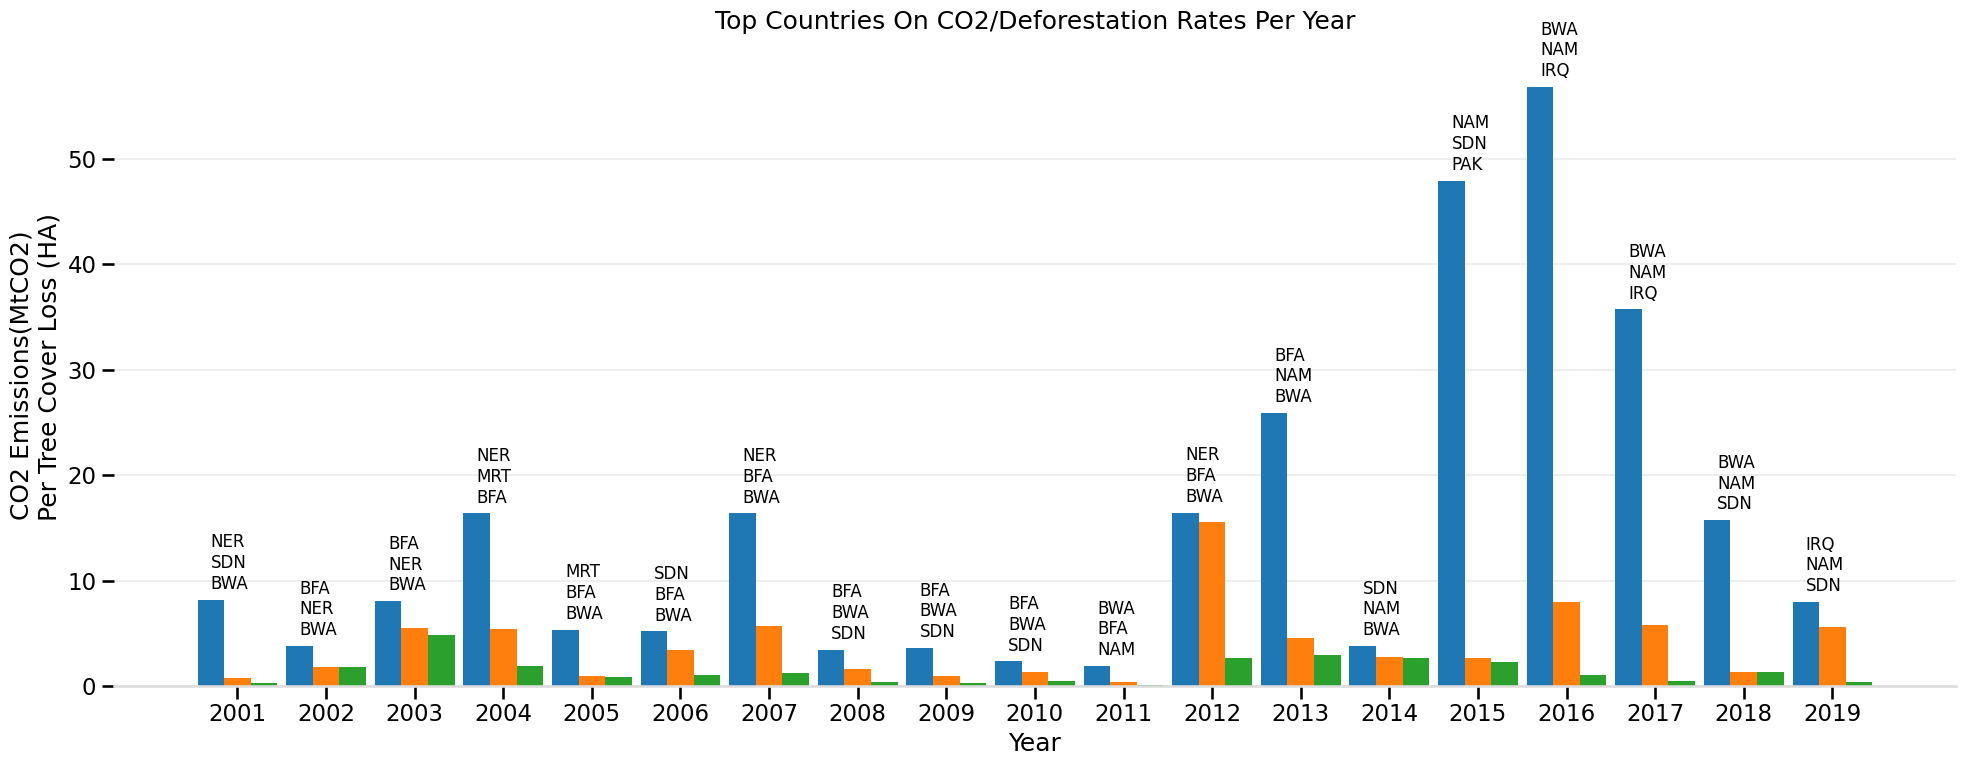

In [121]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(20, 8))

x = df2.Year.unique()
bar_width = 0.3
pos = [i + bar_width for i in x]

# Create bars 
b1 = ax.bar(x, df2[df2.Rank == 1].Rate.to_list(), 
    width=bar_width, label="1st")
b2 = ax.bar(x + bar_width, df2[df2.Rank == 2].Rate.to_list(), 
    width=bar_width, label="1st")
b3 = ax.bar(x + (2*bar_width), df2[df2.Rank == 3].Rate.to_list(), 
    width=bar_width, label="1st")

# Set Plot Labels 
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions(MtCO2) \n Per Tree Cover Loss (HA)")
ax.set_title("Top Countries On CO2/Deforestation Rates Per Year", pad=20)

# Set Spines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Modify Axes and Grids 
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(x)

# Create Labels 
labels = df2.ISO.to_list()
labels = [labels[i:i+3] for i in range(0, len(labels), 3)]
for i, bar in enumerate(ax.patches):
    if i % 3 != 0: continue
    group = labels[i // 3]

    text = "\n".join(group)
    text_x = 2001 + (i // 3)
    text_y = df2.loc[i, "Rate"] + 1

    ax.text(text_x, text_y, text, size=12)

# Show with Tight Layout 
fig.tight_layout()
fig.savefig(out_dir / "top_countries_by_rate_per_year.png")

In [115]:
import plotly.figure_factory as ff
fig = ff.create_table(df2[['ISO', 'Year', 'Rate', 'Rank']])
fig.update_layout(
    autosize=True
)

fig.write_image(Path("output") / "table_top_countries_by_coefficient.png", scale=2)

# Top Countries by Tree Cover Loss 

In [90]:
df3 = pd.read_csv(data_dir / "top_10_countries_by_treeloss.csv", header=None)
df3.columns = ["ISO", "Year", "Treeloss", "sector", "Rank"]
df3 = df3[["ISO", "Year", "Treeloss", "Rank"]]
df3 = df3[df3.Rank <= 3]
df3.reset_index(inplace=True)

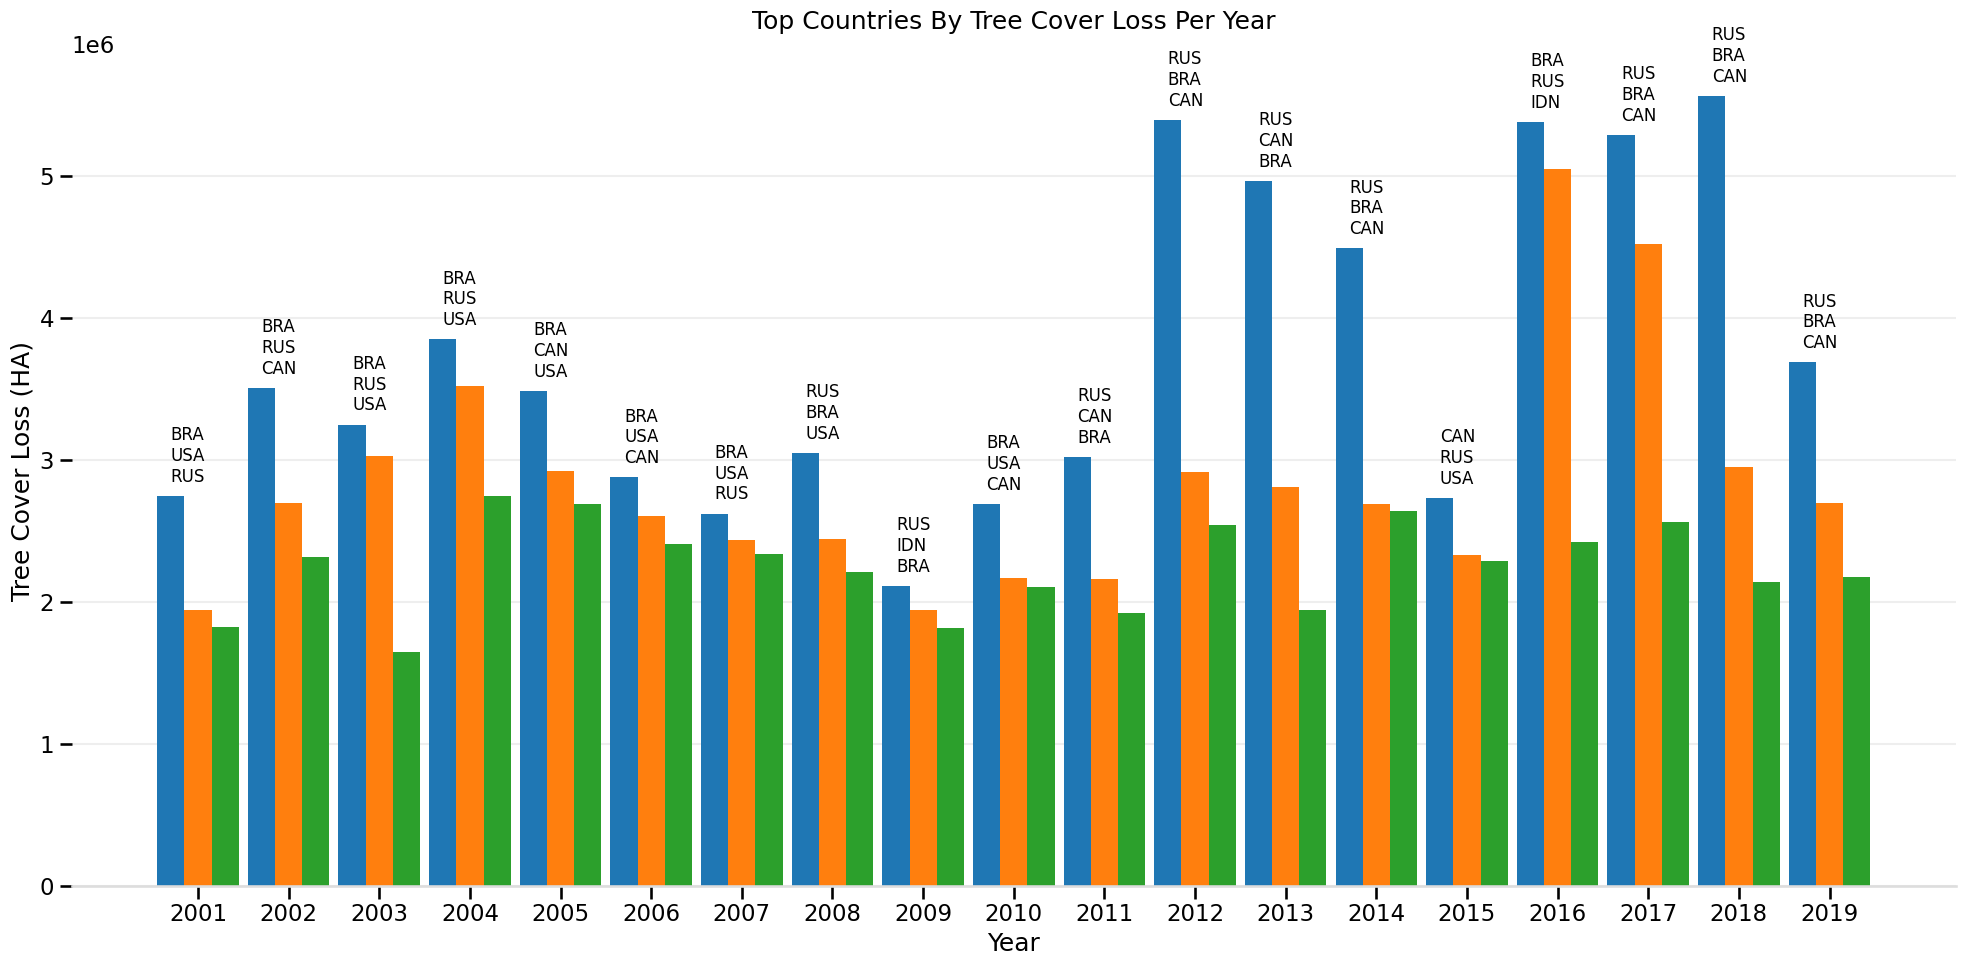

In [122]:
import math 
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(20, 10))

x = df3.Year.unique()
bar_width = 0.3
pos = [i + bar_width for i in x]

# Create bars 
b1 = ax.bar(x, df3[df3.Rank == 1].Treeloss.to_list(), 
    width=bar_width, label="1st")
b2 = ax.bar(x + bar_width, df3[df3.Rank == 2].Treeloss.to_list(), 
    width=bar_width, label="2nd")
b3 = ax.bar(x + (2*bar_width), df3[df3.Rank == 3].Treeloss.to_list(), 
    width=bar_width, label="3rd")

# Set Plot Labels 
ax.set_xlabel("Year")
ax.set_ylabel("Tree Cover Loss (HA)")
ax.set_title("Top Countries By Tree Cover Loss Per Year", pad=20)

# Set Spines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Modify Axes and Grids 
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xticks(pos)
ax.set_xticklabels(x)

# make text 
labels = df3.ISO.to_list()
labels = [labels[i:i+3] for i in range(0, len(labels), 3)]
for i, bar in enumerate(ax.patches):
    if i % 3 != 0: continue
    group = labels[i // 3]

    text = "\n".join(group)
    text_x = 2001 + (i // 3)
    text_y = df3.loc[i, "Treeloss"] + 100_000

    ax.text(text_x, text_y, text, size=12)

# Show with Tight Layout 
fig.tight_layout()
fig.savefig(out_dir / "top_countries_by_treeloss_per_year.png")

In [116]:
fig = ff.create_table(df3[['ISO', 'Year', 'Treeloss', 'Rank']])
fig.update_layout(
    autosize=True
)

fig.write_image(Path("output") / "table_top_countries_by_treeloss.png", scale=2)